# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.exceptions import NotFittedError

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_mobile_legends_v1.csv")
df.head()


,userName,at,content
0,Wanto khetinggalanzaman,2024-10-27 16:18:09,Banyak drack sistem
1,Sall X2447,2024-10-27 16:17:32,Ayolah moonton kasih tim yg bagus aku udah mau...
2,Fauzan Ghani,2024-10-27 16:17:27,"Lbih baik pindah ajja ke game yg lain all,, mo..."
3,Pro Player,2024-10-27 16:15:56,Sampah banget jaringannya
4,Herni Herni,2024-10-27 16:15:48,Sungguh menyenangkan


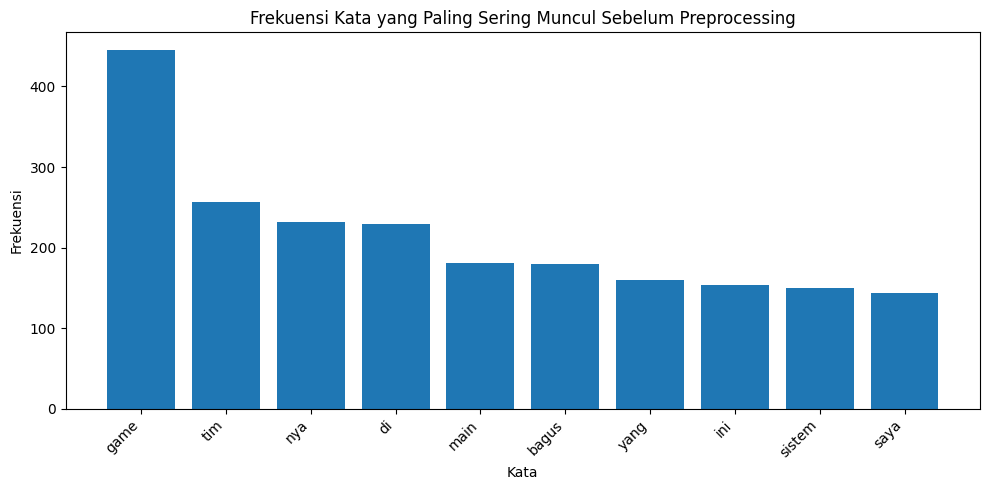

In [3]:
from collections import Counter

# Gabungkan semua teks ulasan menjadi satu string
all_text = ' '.join(df['content'].astype(str).tolist())

# Hapus karakter non-alfanumerik dan ubah menjadi huruf kecil
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text).lower()

# Pisahkan teks menjadi kata-kata
words = all_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata yang paling sering muncul
most_common_words = word_counts.most_common(10)

# Buat bar chart
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kata yang Paling Sering Muncul Sebelum Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Banyak drack sistem
1,Ayolah moonton kasih tim yg bagus aku udah mau...
2,"Lbih baik pindah ajja ke game yg lain all,, mo..."
3,Sampah banget jaringannya
4,Sungguh menyenangkan
...,...
995,Tolong beri saya tim pro
996,Seru pokok nya wajib main si
997,Montod anjg isinya dark sistem semua kntl
998,Keren tapi aku minta satu permintaan yaitu aku...


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()


,content
count,1000
unique,970
top,Bagus
freq,12


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

## **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1000, 1)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(970, 1)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,Banyak drack sistem,banyak drack sistem
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...
3,Sampah banget jaringannya,sampah banget jaringannya
4,Sungguh menyenangkan,sungguh menyenangkan
...,...,...
995,Tolong beri saya tim pro,tolong beri saya tim pro
996,Seru pokok nya wajib main si,seru pokok nya wajib main si
997,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl
998,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...


## **Normalization**

In [23]:
# Normalisasi

norm = {"yg" : "yang",
        "aplk" : "aplikasi",
        "jd" : "jadi",
        "woila" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "geratis" : "gratis",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "elor" : "error",
        "grafick" : "grafik",
        "bngt" : "banget",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "mantapz" : "mantap",
        "maw" : "mau",
        "ajh" : "aja",
        "bnaget" : "banget",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan
...,...,...,...
995,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro
996,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si
997,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl
998,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...


## **Stopwords**

In [24]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [25]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana",
                   "kapan", "bagaimana", "kini", "dulu", "sekarang", "tadi", "besok", "lusa", "satu",
                   "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu", "cukup", "lah",
                   "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu",
                   "gak", "buat", "ke", "ga", "karena", "banget", "hal", "dalam", "amat"]


stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan
...,...,...,...,...
995,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro
996,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si
997,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl
998,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win


## **Tokenize**

In [26]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"[drack, sistem]"
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"[ayolah, moonton, kasih, tim, bagus, udah, mau..."
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"[lbih, baik, pindah, ajja, game, lain, all, mo..."
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"[sampah, jaringannya]"
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"[sungguh, menyenangkan]"
...,...,...,...,...,...
995,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"[tolong, beri, tim, pro]"
996,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"[seru, pokok, wajib, main, si]"
997,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"[montod, anjg, isinya, dark, sistem, semua, kntl]"
998,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"[keren, tapi, minta, permintaan, yaitu, kasih,..."


In [27]:
# Menginisiasi NaN dengan bfill

df_values = df.bfill()
df_values

,content,cleaning,normalization,stopwords,tokenized
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"[drack, sistem]"
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"[ayolah, moonton, kasih, tim, bagus, udah, mau..."
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"[lbih, baik, pindah, ajja, game, lain, all, mo..."
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"[sampah, jaringannya]"
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"[sungguh, menyenangkan]"
...,...,...,...,...,...
995,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"[tolong, beri, tim, pro]"
996,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"[seru, pokok, wajib, main, si]"
997,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"[montod, anjg, isinya, dark, sistem, semua, kntl]"
998,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"[keren, tapi, minta, permintaan, yaitu, kasih,..."


## **Stemming**

In [28]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemming(tokens):
#     return " ".join([stemmer.stem(word) for word in tokens])

# df['stemming'] = df['tokenized'].apply(lambda x: stemming(x))

# df.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_mobile_legends_v1.csv', index=False)


In [29]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_mobile_legends_v1.csv', encoding = 'latin1')
df


,content,cleaning,normalization,stopwords,tokenized,stemming
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"['drack', 'sistem']",drack sistem
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"['ayolah', 'moonton', 'kasih', 'tim', 'bagus',...",ayo moonton kasih tim bagus udah mau mitik mal...
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"['lbih', 'baik', 'pindah', 'ajja', 'game', 'la...",lbih baik pindah ajja game lain all moontoon b...
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"['sampah', 'jaringannya']",sampah jaring
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"['sungguh', 'menyenangkan']",sungguh senang
...,...,...,...,...,...,...
965,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"['tolong', 'beri', 'tim', 'pro']",tolong beri tim pro
966,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"['seru', 'pokok', 'wajib', 'main', 'si']",seru pokok wajib main si
967,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"['montod', 'anjg', 'isinya', 'dark', 'sistem',...",montod anjg isi dark sistem semua kntl
968,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"['keren', 'tapi', 'minta', 'permintaan', 'yait...",keren tapi minta minta yaitu kasih win


# **Data Preparation**

## **Translate**

In [30]:
# Menginstall Library Deep Translator

!pip install deep_translator

In [46]:
# Imputing NaN Values

df_values = df.ffill()

In [47]:
# Fungsi Translating Menggunakan deep_translator

from deep_translator import GoogleTranslator

def convert_eng(text):
  translator = GoogleTranslator()
  translatation = translator.translate(text, lang_tgt='en', lang_src="id")
  return translatation

df_values['translate'] = df_values['stemming'].apply(convert_eng)

df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_mobile_legends_v1.csv', index=False)


In [48]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_mobile_legends_v1.csv')
df_values


,content,cleaning,normalization,stopwords,tokenized,stemming,translate
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"['drack', 'sistem']",drack sistem,drank system
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"['ayolah', 'moonton', 'kasih', 'tim', 'bagus',...",ayo moonton kasih tim bagus udah mau mitik mal...,"Come on Moonton, give us a good team, we wante..."
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"['lbih', 'baik', 'pindah', 'ajja', 'game', 'la...",lbih baik pindah ajja game lain all moontoon b...,It's better to just move to another game. Moon...
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"['sampah', 'jaringannya']",sampah jaring,net trash
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"['sungguh', 'menyenangkan']",sungguh senang,really happy
...,...,...,...,...,...,...,...
965,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"['tolong', 'beri', 'tim', 'pro']",tolong beri tim pro,please give pro team
966,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"['seru', 'pokok', 'wajib', 'main', 'si']",seru pokok wajib main si,Exclamation of the tree must play
967,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"['montod', 'anjg', 'isinya', 'dark', 'sistem',...",montod anjg isi dark sistem semua kntl,montod andog fills the dark system all kntl
968,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"['keren', 'tapi', 'minta', 'permintaan', 'yait...",keren tapi minta minta yaitu kasih win,cool but asking is giving win


## **Labeling**

In [49]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_mobile_legends_v1.csv')
df_values

,content,cleaning,normalization,stopwords,tokenized,stemming,translate
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"['drack', 'sistem']",drack sistem,drank system
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"['ayolah', 'moonton', 'kasih', 'tim', 'bagus',...",ayo moonton kasih tim bagus udah mau mitik mal...,"Come on Moonton, give us a good team, we wante..."
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"['lbih', 'baik', 'pindah', 'ajja', 'game', 'la...",lbih baik pindah ajja game lain all moontoon b...,It's better to just move to another game. Moon...
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"['sampah', 'jaringannya']",sampah jaring,net trash
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"['sungguh', 'menyenangkan']",sungguh senang,really happy
...,...,...,...,...,...,...,...
965,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"['tolong', 'beri', 'tim', 'pro']",tolong beri tim pro,please give pro team
966,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"['seru', 'pokok', 'wajib', 'main', 'si']",seru pokok wajib main si,Exclamation of the tree must play
967,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"['montod', 'anjg', 'isinya', 'dark', 'sistem',...",montod anjg isi dark sistem semua kntl,montod andog fills the dark system all kntl
968,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"['keren', 'tapi', 'minta', 'permintaan', 'yait...",keren tapi minta minta yaitu kasih win,cool but asking is giving win


In [51]:
# # Cek nan di df_values

# # Check for NaN values in the 'translate' column of df_values
# nan_count = df_values['translate'].isnull().sum()
# print(f"Number of NaN values in 'translate' column: {nan_count}")

# # You can also check for NaN values in the entire DataFrame:
# nan_count_df = df_values.isnull().sum().sum()
# print(f"Total number of NaN values in the DataFrame: {nan_count_df}")

# # If you want to see the rows with NaN values:
# rows_with_nan = df_values[df_values['translate'].isnull()]
# rows_with_nan

In [52]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [53]:
# Labeling With TextBlob

from textblob import TextBlob

label_df = list(df_values['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, data in enumerate(label_df):
    blob = TextBlob(str(data))
    sentiment = blob.sentiment.polarity
    polaritas += sentiment

    if sentiment > 0.0:
        total_positif += 1
        status.append("Positif")
    elif sentiment < 0.0:
        total_negatif += 1
        status.append("Negatif")
    else:
        total_netral += 1
        status.append("Netral")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 400
Netral = 181
Negatif = 389

Total Data Seluruhnya : 970


In [54]:
# Melihat Label Sentimen & Polarity

df_values['sentimen'] = status
df_values['polaritas'] = [TextBlob(text).sentiment.polarity for text in df_values['translate']]

df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/data_classified_mobile_legends_v1.csv', index=False)


In [56]:
# Cek Label & Polaritas

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/data_classified_mobile_legends_v1.csv')
df_values


,content,cleaning,normalization,stopwords,tokenized,stemming,translate,sentimen,polaritas
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"['drack', 'sistem']",drack sistem,drank system,Netral,0.000
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"['ayolah', 'moonton', 'kasih', 'tim', 'bagus',...",ayo moonton kasih tim bagus udah mau mitik mal...,"Come on Moonton, give us a good team, we wante...",Positif,0.700
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"['lbih', 'baik', 'pindah', 'ajja', 'game', 'la...",lbih baik pindah ajja game lain all moontoon b...,It's better to just move to another game. Moon...,Negatif,-0.050
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"['sampah', 'jaringannya']",sampah jaring,net trash,Netral,0.000
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"['sungguh', 'menyenangkan']",sungguh senang,really happy,Positif,0.800
...,...,...,...,...,...,...,...,...,...
965,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"['tolong', 'beri', 'tim', 'pro']",tolong beri tim pro,please give pro team,Netral,0.000
966,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"['seru', 'pokok', 'wajib', 'main', 'si']",seru pokok wajib main si,Exclamation of the tree must play,Netral,0.000
967,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"['montod', 'anjg', 'isinya', 'dark', 'sistem',...",montod anjg isi dark sistem semua kntl,montod andog fills the dark system all kntl,Negatif,-0.150
968,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"['keren', 'tapi', 'minta', 'permintaan', 'yait...",keren tapi minta minta yaitu kasih win,cool but asking is giving win,Positif,0.575


## **Splitting Data & TF - IDF**

In [57]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = df_values['translate']
y = df_values['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# **Implementasi Algoritma & Evaluasi**

## **Implementasi Algoritma Naive Bayes**

In [59]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Periksa Jumlah Sampel di Setiap Variabel

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


776
194
776
194


In [61]:
# # Selaraskan Jumlah Baris

# X_train = X_train.iloc[:min(len(X_train), len(y_train))]  # Sesuaikan jumlah sampel
# y_train = y_train.iloc[:min(len(X_train), len(y_train))]


In [62]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [63]:
y_pred = naive_bayes.predict(X_test_vec)

## **Pengujian Kinerja Model**


1.   Classification Report
2.   Confusion Matrix




In [64]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Netral','Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

# Confusion Matrix

from sklearn.metrics import confusion_matrix

cmnb = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cmnb)

Akurasi Model Naive Bayes :  0.6288659793814433

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.58      0.70      0.63        73
      Netral       1.00      0.06      0.11        34
     Negatif       0.66      0.79      0.72        87

    accuracy                           0.63       194
   macro avg       0.75      0.52      0.49       194
weighted avg       0.69      0.63      0.58       194

Confusion matrix

 [[51  0 22]
 [19  2 13]
 [18  0 69]]


In [65]:
# Membangun Model SVM

from sklearn.svm import SVC

# Membangun Model SVM Classifier
svm_model = SVC(kernel='linear')  # Anda dapat mengubah kernel jika diperlukan (linear, rbf, poly, dll.)
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluasi Model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cmsvm = confusion_matrix(y_test, y_pred_svm)

print("Akurasi SVM:", accuracy_svm)
print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred_svm))
print('Confusion matrix\n\n', cmsvm)

Akurasi SVM: 0.7525773195876289

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.71      0.75      0.73        73
      Netral       0.81      0.76      0.79        34
     Positif       0.76      0.75      0.76        87

    accuracy                           0.75       194
   macro avg       0.76      0.76      0.76       194
weighted avg       0.75      0.75      0.75       194

Confusion matrix

 [[55  1 17]
 [ 5 26  3]
 [17  5 65]]


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



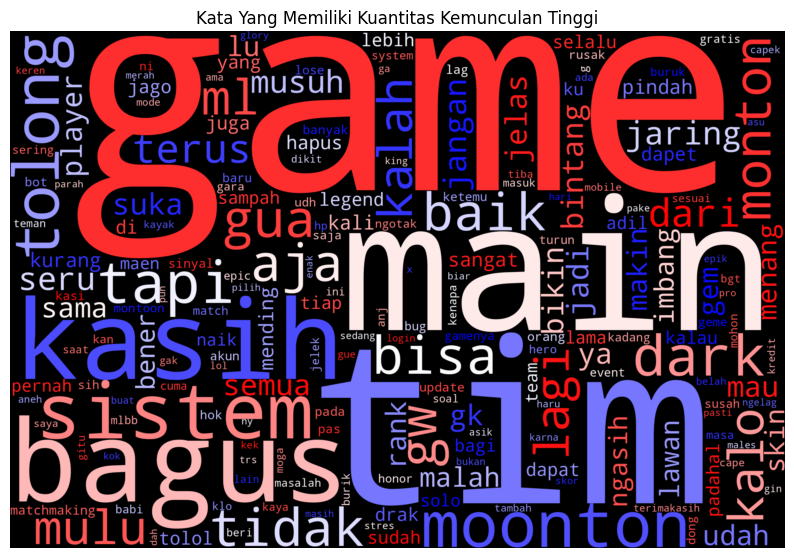

In [66]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

# Memfilter hanya data string yang valid
all_words = ' '.join([str(reviews) for reviews in df_values['stemming'] if isinstance(reviews, str)])

# Membuat WordCloud
wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

# Menampilkan WordCloud
plot_cloud(wordcloud)


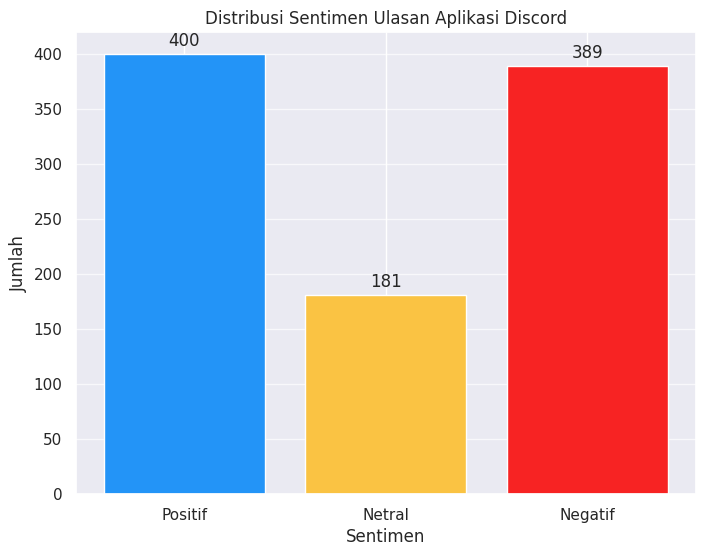

In [67]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Netral', 'Negatif']
counts = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#fac343', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Discord")

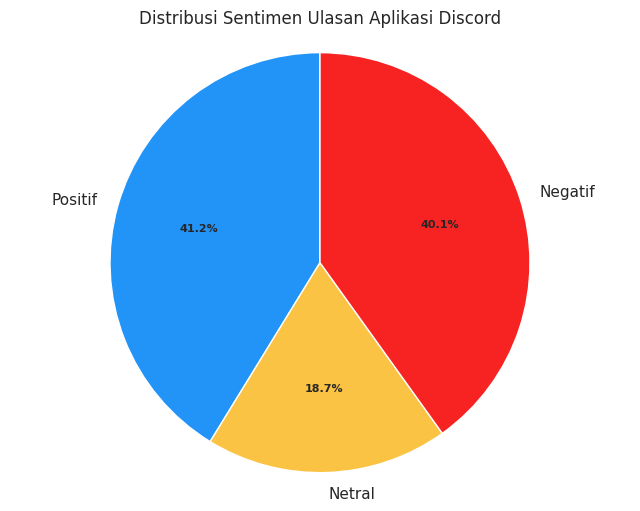

In [68]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Netral', 'Negatif']
counts = [total_positif, total_netral, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#fac343', '#f72323']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Discord")

In [69]:
# Replace Data Sentimen

df_final = df_values.replace({'Positif':0, 'Netral':1, 'Negatif':2})
df_final

,content,cleaning,normalization,stopwords,tokenized,stemming,translate,sentimen,polaritas
0,Banyak drack sistem,banyak drack sistem,banyak drack sistem,drack sistem,"['drack', 'sistem']",drack sistem,drank system,1,0.000
1,Ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yg bagus aku udah mau...,ayolah moonton kasih tim yang bagus aku udah m...,ayolah moonton kasih tim bagus udah mau mitik ...,"['ayolah', 'moonton', 'kasih', 'tim', 'bagus',...",ayo moonton kasih tim bagus udah mau mitik mal...,"Come on Moonton, give us a good team, we wante...",0,0.700
2,"Lbih baik pindah ajja ke game yg lain all,, mo...",lbih baik pindah ajja ke game yg lain all moon...,lbih baik pindah ajja ke game yang lain all mo...,lbih baik pindah ajja game lain all moontoon b...,"['lbih', 'baik', 'pindah', 'ajja', 'game', 'la...",lbih baik pindah ajja game lain all moontoon b...,It's better to just move to another game. Moon...,2,-0.050
3,Sampah banget jaringannya,sampah banget jaringannya,sampah banget jaringannya,sampah jaringannya,"['sampah', 'jaringannya']",sampah jaring,net trash,1,0.000
4,Sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,sungguh menyenangkan,"['sungguh', 'menyenangkan']",sungguh senang,really happy,0,0.800
...,...,...,...,...,...,...,...,...,...
965,Tolong beri saya tim pro,tolong beri saya tim pro,tolong beri saya tim pro,tolong beri tim pro,"['tolong', 'beri', 'tim', 'pro']",tolong beri tim pro,please give pro team,1,0.000
966,Seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok nya wajib main si,seru pokok wajib main si,"['seru', 'pokok', 'wajib', 'main', 'si']",seru pokok wajib main si,Exclamation of the tree must play,1,0.000
967,Montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,montod anjg isinya dark sistem semua kntl,"['montod', 'anjg', 'isinya', 'dark', 'sistem',...",montod anjg isi dark sistem semua kntl,montod andog fills the dark system all kntl,2,-0.150
968,Keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi aku minta satu permintaan yaitu aku...,keren tapi minta permintaan yaitu kasih win,"['keren', 'tapi', 'minta', 'permintaan', 'yait...",keren tapi minta minta yaitu kasih win,cool but asking is giving win,0,0.575


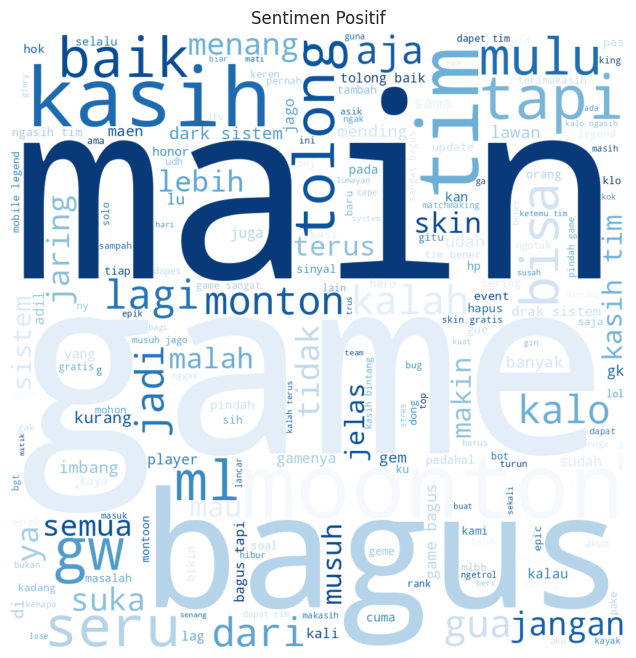

In [70]:
# Visualisasi Wordcould Positif & Negatif

data_positif = df_final[df_final['sentimen'] == 0]
data_netral = df_final[df_final['sentimen'] == 1]
data_negatif = df_final[df_final['sentimen'] == 2]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['stemming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

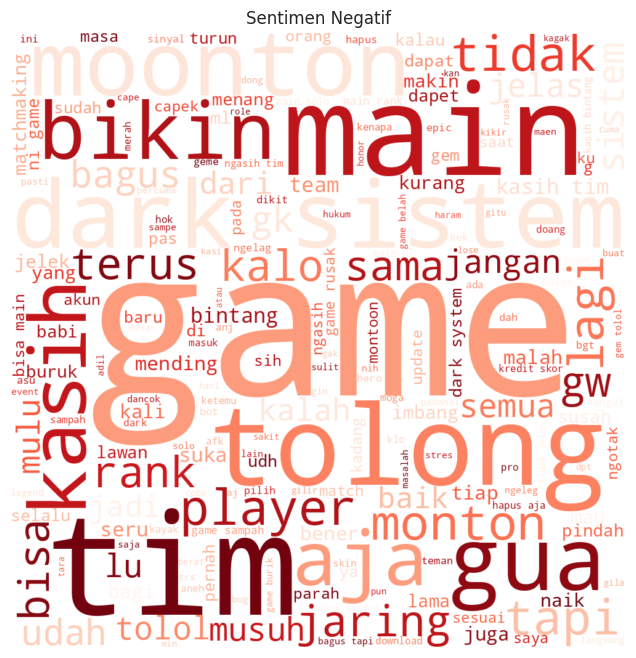

In [71]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['stemming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

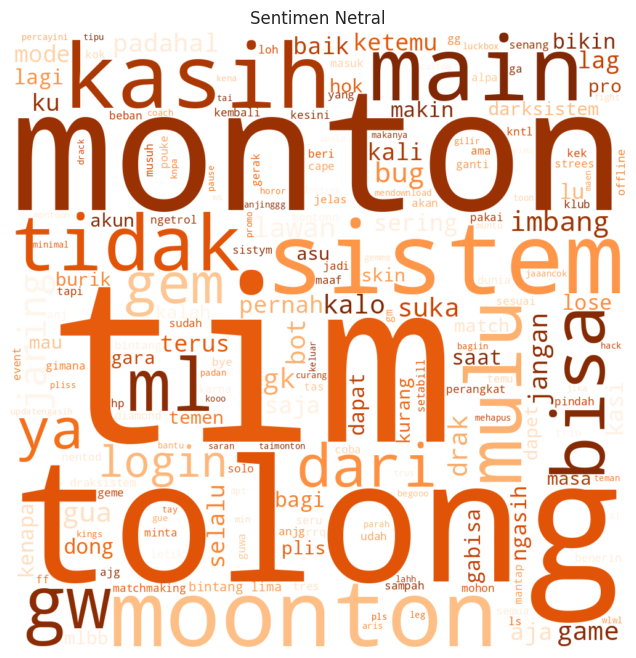

In [72]:
# Sentimen Netral

all_words = ' '.join([str(reviews) for reviews in data_netral['stemming'] if isinstance(reviews, str)])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

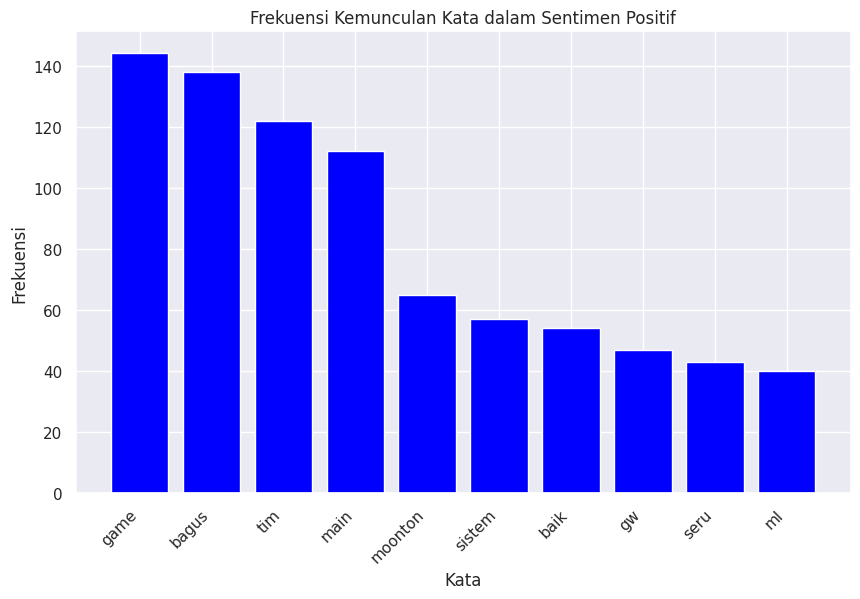

In [78]:
# Frekuensi Kemunculan Kata dalam Sentimen Positif

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih","masuk"}

# Menggabungkan semua teks dari sentimen positif
all_texts_positif = ' '.join(data_positif['stemming'])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Positif')
plt.xticks(rotation=45, ha='right')
plt.show()


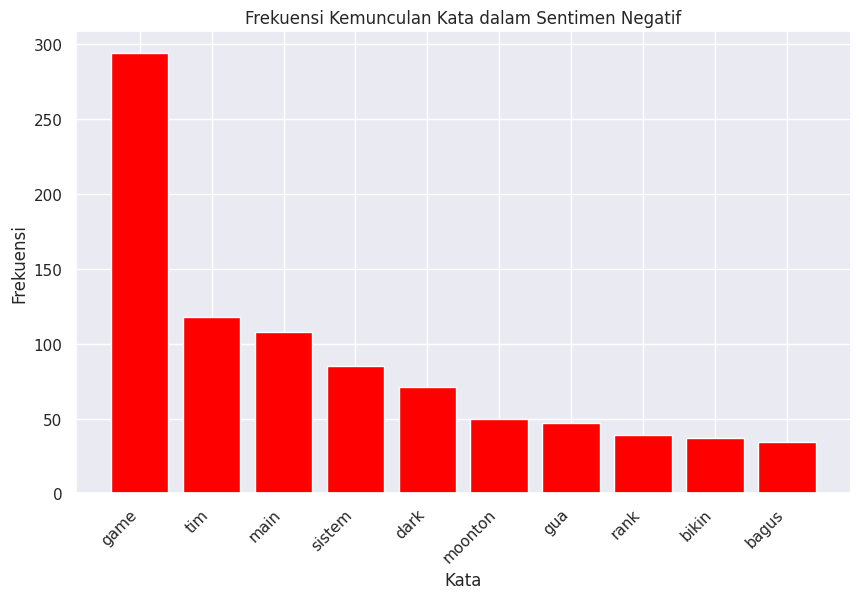

In [79]:
# Frekuensi Kemunculan Kata dalam Sentimen Negatif

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih", "masuk", "gk", "terus", "udh", "baik"}

# Menggabungkan semua teks dari sentimen negatif
all_texts_positif = ' '.join(data_negatif['stemming'])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='red')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Negatif')
plt.xticks(rotation=45, ha='right')
plt.show()


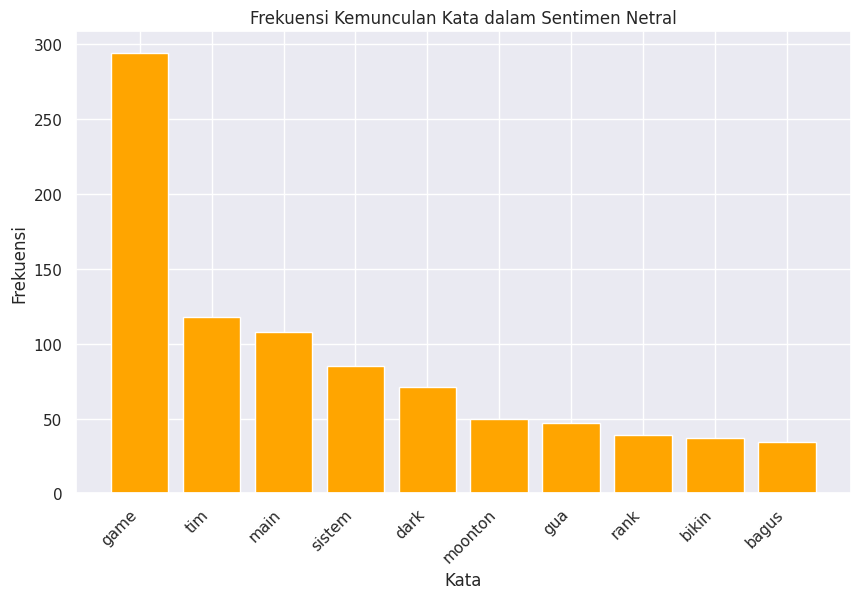

In [80]:
# Frekuensi Kemunculan Kata dalam Sentimen Netral

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih", "masuk", "gk", "terus", "udh", "baik",
                 "kok", "mohon", "telah"}

# Memfilter data yang valid (hanya string)
all_texts_netral = ' '.join([str(text) for text in data_netral['stemming'] if isinstance(text, str)])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='orange')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Netral')
plt.xticks(rotation=45, ha='right')
plt.show()


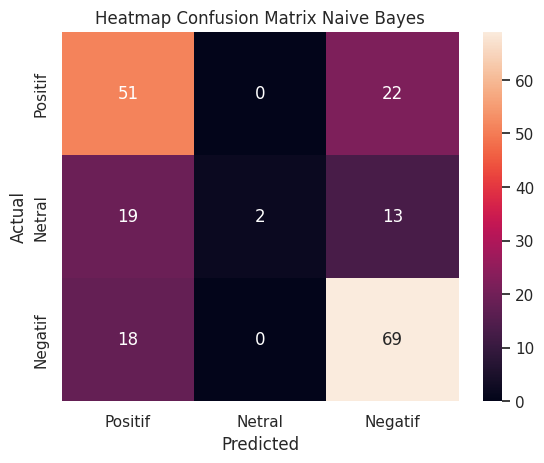

In [81]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cmnb, columns=['Positif', 'Netral', 'Negatif'],
                         index=['Positif', 'Netral', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix Naive Bayes')
plt.show()

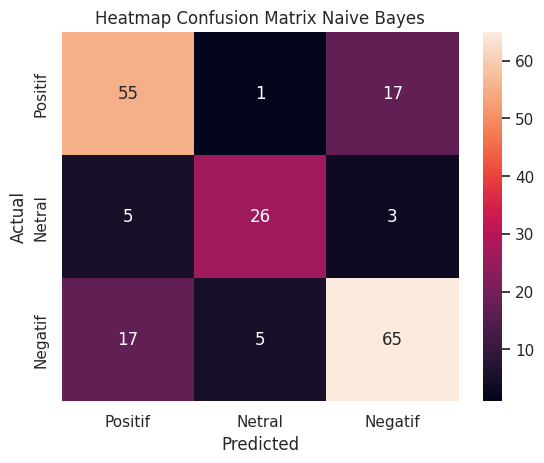

In [82]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cmsvm, columns=['Positif', 'Netral', 'Negatif'],
                         index=['Positif', 'Netral', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix Naive Bayes')
plt.show()

# **Simpan Model dan Vectorizer Ke Pickle**

In [ ]:
import joblib

# Simpan model Naive Bayes
joblib.dump(svm_model, 'support_vector_machine_model_6.pkl')

# Simpan TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer_6.pkl')

print("Model dan vectorizer berhasil disimpan!")


Model dan vectorizer berhasil disimpan!


In [ ]:
# Cek versi library yang digunakan
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.2
Matplotlib version: 3.7.1
Seaborn version: 0.13.2
